# House Prices Predition

Este Notebook será utilizado para a elaboração de modelos matemáticos, baseado em regressão linear, para a predição de valores de casas à partir de um conjunto de variáveis (features).

# Bibliotecas Necessárias para o desenvolvimento do modelo.

Serão carregadas as principais bibliotecas para a construção do modelo de Regressão Linear.

In [1]:
# Bibliotecas e módulos utilizados no caderno.
import numpy as np                                  # Pacote para Computação Científica (Manipulação de matrizes)
import pandas as pd                                 # Pacote para auxílio em Análise de Dados
import statistics as sts
import statsmodels.api as sm                        # Pacote para manipulação de operações estatísticas
import matplotlib.pyplot as plt                     # Biblioteca para criação de gráficos e visualizações de dados em geral.
from sklearn.linear_model import LinearRegression   # Módulo para a regressão linear com a biblioteca de ferramentas para o Aprendizado de máquinas.
from sklearn.model_selection import train_test_split # Importa uma função da biblioteca sklearn para a separação dos dados de teste e de validação.
from sklearn.metrics import accuracy_score          # Método de verificação da acurácia do modelo.
import seaborn as sns                               # Biblioteca de visualização de dados baseado na biblioteca marplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge       # Biblioteca para a aplicação da regularização L1 e L2.
sns.set()     

# Carregamento do arquivo.

Neste tópico será carregado o arquivo que contém os dados que serão utilizados tanto para treinamento do modelo, quando para a validação.

Inicialmente esses dados então em uma estrutura separada por vírgulas e serão importados para o padrão de data frame.

In [2]:
# Importando o arquivo .csv para um data frame
dados = pd.read_csv('train.csv')

Lembrando que o arquivo que foi importado encontra-se na mesma pasta do arquivo Notebook, por isso não foi necessário passar o caminho.

# Visualização Geral do Conjunto de Dados

Inicialmente será verificada, visualmente, de como está a distribuição dos dados no Data Frame.

In [3]:
# Configuração inicial para que sejam mostradas todas as colunas do data frame
pd.set_option('display.max_columns', 82)
# Visualização das 3 primeiras linhas
dados.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Separação dos Dados de treinamento dos dados de Validação

Inicialmente serão separados os dados de treinamento do modelo dos dados que serão utilizados para o treinamento.
Após essa separação iremos manipular apenas os dados de treinamento.

In [4]:
# Separação das targets e das features.
features = dados.drop(columns=['SalePrice'])       # Separa apenas os dados característicos
targets = dados['SalePrice']                       # Separa os dados de referência


# Função de separação dos dados de treinamento e dos dados de validação
X_treinamento, X_validacao, y_treinamento, y_validacao = train_test_split(features, targets, test_size = 0.2, random_state = 42)

# Criação de um Data frame apenas com os valores de treino.
dados_treino = pd.concat([X_treinamento,y_treinamento], axis = 1)

# Cópia do dataframe dados_treino para a eliminação de valores considerados anómalos. 
df_sem_outlier = dados_treino
# df_sem_outlier = dados_treino.copy()

# Atribuindo um nome 
nome_target = 'SalePrice'

# dados_treino.head()

# Declaração de Data Frames

Serão declarados Data frames que servirão para armazenar os dados para a regressão linear e que auxiliarão nas equações.

In [5]:
# Data frame que armazenará os valores finais da features para a regressão linear
features_numericas = pd.DataFrame()

# Data frame que armazenará os dados da features aplicada o logarítimo neperiano para a regressão linear
features_ln_numericas = pd.DataFrame()

# Data frame com as features numericas sem outlier - 
# Outlier sendo qualquer valor fora do intervalo (< mediana - 3* std e > mediana +3* std)
features_numericas_sem_outlier = pd.DataFrame()

# Data frame para features sem outlier com aplicação do logarítimo neperiano.
features_ln_numericas_sem_outlier = pd.DataFrame()


# Data frame que armezenará os dados de todas as features com a aplicação do logarítmo neperiano
df_ln = pd.DataFrame()

# Data frame que armezenará os dados de todas as features com a aplicação do logarítmo neperiano com a eliminação de alguns valores
df_ln_sem_outlier = pd.DataFrame()


nome_linhas = ['Regressão Linear Teste', 'Regressão Linear Validação',\
               'Regressão Linear L1 Teste', 'Regressão Linear L1 Validação',\
               'Regressão Linear L2 Teste', 'Regressão Linear L2 Validação']
nome_colunas = ['Numéricas', 'Tranformada ln', 'Numéricas sem Outlier', 'Transformada ln sem Outlier']

# Data frame de armazenamento dos valores de R^2(coeficiente de determinação) dos modelos
score_df = pd.DataFrame(index=nome_linhas, columns=nome_colunas)

# VISUALIZAÇÃO GERAL DO DATA FRAME DE TREINAMENTO

In [6]:
# Configuração inicial para que sejam mostradas todas as colunas do data frame
pd.set_option('display.max_rows', 81)
# VERIFICAÇÃO DE VALORES NÃO VÁLIDOS DO DATA FRAME
display(dados_treino)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr

# Tratamento individual das variáveis.

Nesse tópico cada variável (feature) será avaliada individualmente. Essa análise incluirá: o valor semântico de cada 'feature'; a disposição dos dados da variável; a eliminação (ou substituição) de valores não válidos; a substituição de valores anormais quando comparado ao conjunto de dados; a verificação dessa feature com a variável alvo do modelo. 

Serão armazenados valores sem transformação e valores com a aplicação do logarítmo neperiano às features.

Como referência para a escolha, serão selecionados apenas as features que possuírem uma correlação >= 0.1 ou <= -0.1. 

Tanto para as variáveis não transformadas quanto para as transformadas. 

## MSSubClass (Numérica)

Variável que indica o tipo de habitação envolvida na venda.

In [7]:
nome_feature = 'MSSubClass'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armazenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armazenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre MSSubClass e SalePrice

            MSSubClass  SalePrice
MSSubClass    1.000000  -0.088081
SalePrice    -0.088081   1.000000

Correlação entre ln<MSSubClass> e ln<SalePrice>

            MSSubClass  SalePrice
MSSubClass    1.000000  -0.023143
SalePrice    -0.023143   1.000000

Correlação entre MSSubClass e SalePrice SEM OUTLIER

            MSSubClass  SalePrice
MSSubClass    1.000000  -0.021937
SalePrice    -0.021937   1.000000

Correlação entre ln<MSSubClass> e ln<SalePrice> SEM OUTLIER

            MSSubClass  SalePrice
MSSubClass    1.000000   0.025657
SalePrice     0.025657   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

## MSZoning (Categórica)

Identifica a classificação geral de zoneamento da venda.

In [8]:
nome_feature = 'MSZoning'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ FV + RH + RL + RM", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:
MSZoning
C (all)      4
FV          53
RH          15
RL         924
RM         172
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     31.03
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.41e-24
Time:                        18:50:34   Log-Likelihood:                -14743.
No. Observations:                1168   AIC:                         2.950e+04
Df Residuals:                    1163   BIC:                         2.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.045e+04   3.68e+04      2.459      0.014    1.83e+04    1.63e+05
FV          1.256e+05   3.81e+04      3.291      0.001    5.07e+04       2e+05
RH          4.101e+04   4.14e+04      0.991      0.322   -4.02e+04    1.22e+05
RL          9.989e+04   3.69e+04      2.710      0.007    2.76e+04    1.72e+05
RM          3.901e+04   3.72e+04      1.048      0.295    -3.4e+04    1.12e+05
==============================================================================
Omnibus:                      494.400   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2786.498
Skew:                           1.889   Prob(JB):                         0.00
Kurtosis:                       9.556   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando os dados da regressão linear apenas com essa variável categórica, tem-se: 

**R-squared:** 0.096. -> Isso significa que essa regressão representa aproximadamente 10% da variável dependente.
**F-statistic:** 31,03 -> Não podemos excluir a hipótese H0, ou seja, não podemos garantir que alguma variável indepente seja significante para a variável dependente.

Os valores de **P>|t|** nos ajudar na informação de que as variáveis RH e RM não são significativas para a variável dependente. 



## LotFrontage (Numérica)

Perímetro de conexão do imóvel com a rua.

In [9]:
nome_feature = 'LotFrontage'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 217


Correlação entre LotFrontage e SalePrice

             LotFrontage  SalePrice
LotFrontage     1.000000   0.312157
SalePrice       0.312157   1.000000

Correlação entre ln<LotFrontage> e ln<SalePrice>

             LotFrontage  SalePrice
LotFrontage      1.00000    0.32806
SalePrice        0.32806    1.00000

Correlação entre LotFrontage e SalePrice SEM OUTLIER

             LotFrontage  SalePrice
LotFrontage     1.000000   0.326944
SalePrice       0.326944   1.000000

Correlação entre ln<LotFrontage> e ln<SalePrice> SEM OUTLIER

             LotFrontage  SalePrice
LotFrontage     1.000000   0.324734
SalePrice       0.324734   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_o

## LotArea (Numérica)

Área do imóvel

In [10]:
nome_feature = 'LotArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre LotArea e SalePrice

            LotArea  SalePrice
LotArea    1.000000   0.266204
SalePrice  0.266204   1.000000

Correlação entre ln<LotArea> e ln<SalePrice>

           LotArea  SalePrice
LotArea     1.0000     0.4113
SalePrice   0.4113     1.0000

Correlação entre LotArea e SalePrice SEM OUTLIER

            LotArea  SalePrice
LotArea    1.000000   0.379244
SalePrice  0.379244   1.000000

Correlação entre ln<LotArea> e ln<SalePrice> SEM OUTLIER

            LotArea  SalePrice
LotArea    1.000000   0.395981
SalePrice  0.395981   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## Street (Categórica)

Tipo de estrada de acesso à propriedade.

In [11]:
nome_feature = 'Street'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Pave", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:
Street
Grvl       4
Pave    1164
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2797
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.597
Time:                        18:50:34   Log-Likelihood:                -14802.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1166   BIC:                         2.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.61e+05   3.86e+04      4.167      0.000    8.52e+04    2.37e+05
Pave        2.047e+04   3.87e+04      0.529      0.597   -5.55e+04    9.64e+04
==============================================================================
Omnibus:                      443.143   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2031.760
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                       8.444   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando de forma geral, tanto pela quantidade de dados quanto pelos valores característico da regressão linear construído apenas com essa variável, é perceptível pelos valores de "R-squared", "F-statistic" e t que essa variável não é significativa para a variável dependente. SalePrice.

## Alley (Categórica)

Tipo de rua de acesso à propriedade

In [12]:
nome_feature = 'Alley'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')


Número de valores não válidos: 1094



Devido a grande quantidade de valores não válidos nessa variável iremos eliminá-la das análises.

## LotShape (Categórica)

Forma geral da propriedade.

In [13]:
nome_feature = 'LotShape'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ IR2 + IR3 + Reg", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:
LotShape
IR1    394
IR2     37
IR3      8
Reg    729
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     29.31
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.84e-18
Time:                        18:50:34   Log-Likelihood:                -14760.
No. Observations:                1168   AIC:                         2.953e+04
Df Residuals:                    1164   BIC:                         2.955e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+05   3758.112     53.982      0.000    1.95e+05     2.1e+05
IR2         3.732e+04   1.28e+04      2.910      0.004    1.22e+04    6.25e+04
IR3         2.272e+04   2.66e+04      0.853      0.394   -2.95e+04     7.5e+04
Reg        -3.648e+04   4664.400     -7.821      0.000   -4.56e+04   -2.73e+04
==============================================================================
Omnibus:                      455.945   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2216.674
Skew:                           1.774   Prob(JB):                         0.00
Kurtosis:                       8.741   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LandContour (Categórica)

Planicidade da propriedade.

In [14]:
nome_feature = 'LandContour'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ HLS + Low + Lvl", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LandContour
Bnk      48
HLS      35
Low      26
Lvl    1059
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     12.95
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.51e-08
Time:                        18:50:34   Log-Likelihood:                -14783.
No. Observations:                1168   AIC:                         2.957e+04
Df Residuals:                    1164   BIC:                         2.960e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.425e+05    1.1e+04     12.975      0.000    1.21e+05    1.64e+05
HLS         1.026e+05   1.69e+04      6.063      0.000    6.94e+04    1.36e+05
Low         5.841e+04   1.85e+04      3.152      0.002     2.2e+04    9.48e+04
Lvl         3.809e+04   1.12e+04      3.392      0.001    1.61e+04    6.01e+04
==============================================================================
Omnibus:                      442.006   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2126.470
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       8.651   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Utilities (Categórica)

Tipo de utilitários disponíveis.

In [15]:
nome_feature = 'Utilities'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ NoSeWa", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Utilities
AllPub    1167
NoSeWa       1
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3235
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.570
Time:                        18:50:34   Log-Likelihood:                -14802.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1166   BIC:                         2.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.815e+05   2262.379     80.216      0.000    1.77e+05    1.86e+05
NoSeWa     -4.398e+04   7.73e+04     -0.569      0.570   -1.96e+05    1.08e+05
==============================================================================
Omnibus:                      443.291   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2034.029
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                       8.448   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LotConfig (Categórica)

Configuração do Lote

In [16]:
nome_feature = 'LotConfig'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ CulDSac + FR2 + FR3 + Inside", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LotConfig
Corner     221
CulDSac     84
FR2         38
FR3          3
Inside     822
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.971
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.52e-05
Time:                        18:50:34   Log-Likelihood:                -14789.
No. Observations:                1168   AIC:                         2.959e+04
Df Residuals:                    1163   BIC:                         2.961e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.767e+05   5144.928     34.345      0.000    1.67e+05    1.87e+05
CulDSac     4.654e+04   9803.690      4.747      0.000    2.73e+04    6.58e+04
FR2         1633.7870   1.34e+04      0.122      0.903   -2.47e+04     2.8e+04
FR3         3.997e+04   4.45e+04      0.899      0.369   -4.73e+04    1.27e+05
Inside      1758.6229   5795.428      0.303      0.762   -9612.041    1.31e+04
==============================================================================
Omnibus:                      438.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.485
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       8.363   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LandSlope (Categórica)

Inclinação da Propriedade.

In [17]:
nome_feature = 'LandSlope'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Mod + Sev", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LandSlope
Gtl    1108
Mod      51
Sev       9
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.918
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0544
Time:                        18:50:34   Log-Likelihood:                -14800.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1165   BIC:                         2.962e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.803e+05   2317.353     77.793      0.000    1.76e+05    1.85e+05
Mod         1.877e+04    1.1e+04      1.699      0.090   -2908.388    4.04e+04
Sev         4.516e+04   2.58e+04      1.749      0.080   -5487.291    9.58e+04
==============================================================================
Omnibus:                      442.664   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2061.157
Skew:                           1.731   Prob(JB):                         0.00
Kurtosis:                       8.510   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Neighborhood (Categórica)

Locais físicos dentro dos limites da cidade.

In [18]:
nome_feature = 'Neighborhood'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Blueste + BrDale + BrkSide + ClearCr + CollgCr + Crawfor + Edwards + Gilbert + IDOTRR + MeadowV + Mitchel + NAmes + NoRidge + NridgHt + OldTown + SWISU + Sawyer + SawyerW + Somerst + StoneBr + Timber + Veenker", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Neighborhood
Blmngtn     15
Blueste      1
BrDale      13
BrkSide     45
ClearCr     19
CollgCr    115
Crawfor     44
Edwards     87
Gilbert     65
IDOTRR      26
MeadowV     10
Mitchel     40
NAmes      181
NPkVill      7
NWAmes      66
NoRidge     33
NridgHt     61
OldTown     91
SWISU       21
Sawyer      58
SawyerW     44
Somerst     69
StoneBr     20
Timber      28
Veenker      9
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          3.93e-170
Time:                        18:50:34   Log-Likelihood:                -14362.
No. Observations:                1168   AIC:                         2.877e+04
Df Residuals:                    1145   BIC:                         2.889e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.862e+05   5700.635     32.671      0.000    1.75e+05    1.97e+05
Blueste    -6.225e+04   5.38e+04     -1.157      0.247   -1.68e+05    4.33e+04
BrDale     -8.533e+04   1.59e+04     -5.370      0.000   -1.17e+05   -5.42e+04
BrkSide    -6.361e+04   9800.378     -6.490      0.000   -8.28e+04   -4.44e+04
ClearCr     3.559e+04   1.35e+04      2.631      0.009    9051.854    6.21e+04
CollgCr     1.486e+04   7573.948      1.963      0.050       4.123    2.97e+04
Crawfor     2.534e+04   9873.790      2.566      0.010    5966.943    4.47e+04
Edwards    -5.834e+04   8085.049     -7.216      0.000   -7.42e+04   -4.25e+04
Gilbert     1.029e+04   8746.057      1.177      0.239   -6866.961    2.75e+04
IDOTRR     -7.962e+04   1.19e+04     -6.670      0.000   -1.03e+05   -5.62e+04
MeadowV    -8.436e+04   1.78e+04     -4.727      0.000   -1.19e+05   -4.93e+04
Mitchel    -2.928e+04   1.02e+04     -2.871      0.004   -4.93e+04   -9271.021
NAmes      -3.884e+04   6949.605     -5.589      0.000   -5.25e+04   -2.52e+04
NoRidge     1.369e+05   1.09e+04     12.545      0.000    1.16e+05    1.58e+05
NridgHt     1.259e+05   8909.462     14.132      0.000    1.08e+05    1.43e+05
OldTown    -5.336e+04   7995.195     -6.674      0.000    -6.9e+04   -3.77e+04
SWISU      -4.142e+04    1.3e+04     -3.190      0.001   -6.69e+04   -1.59e+04
Sawyer     -4.938e+04   9044.523     -5.460      0.000   -6.71e+04   -3.16e+04
SawyerW    -5789.9205   9873.790     -0.586      0.558   -2.52e+04    1.36e+04
Somerst     4.016e+04   8599.011      4.670      0.000    2.33e+04     5.7e+04
StoneBr     1.164e+05   1.32e+04      8.784      0.000    9.04e+04    1.42e+05
Timber      4.989e+04   1.16e+04      4.300      0.000    2.71e+04    7.27e+04
Veenker      6.57e+04   1.87e+04      3.510      0.000     2.9e+04    1.02e+05
==============================================================================
Omnibus:                      462.641   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3513.155
Skew:                           1.636   Prob(JB):                         0.00
Kurtosis:                      10.841   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Condition1 (Categórica)

Proximidade com pontos de referências

In [19]:
nome_feature = 'Condition1'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Feedr + Norm + PosA + PosN + RRAe + RRAn + RRNe + RRNn", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Condition1
Artery      40
Feedr       66
Norm      1004
PosA         8
PosN        15
RRAe        10
RRAn        19
RRNe         1
RRNn         5
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.414
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.03e-06
Time:                        18:50:34   Log-Likelihood:                -14781.
No. Observations:                1168   AIC:                         2.958e+04
Df Residuals:                    1159   BIC:                         2.963e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.399e+05    1.2e+04     11.621      0.000    1.16e+05    1.63e+05
Feedr       2042.9242   1.53e+04      0.134      0.893   -2.79e+04     3.2e+04
Norm        4.477e+04   1.23e+04      3.648      0.000    2.07e+04    6.89e+04
PosA        8.601e+04   2.95e+04      2.917      0.004    2.82e+04    1.44e+05
PosN        8.295e+04    2.3e+04      3.599      0.000    3.77e+04    1.28e+05
RRAe        1175.0000   2.69e+04      0.044      0.965   -5.16e+04     5.4e+04
RRAn        5.909e+04   2.12e+04      2.786      0.005    1.75e+04    1.01e+05
RRNe        4.713e+04   7.71e+04      0.612      0.541   -1.04e+05    1.98e+05
RRNn        7.253e+04   3.61e+04      2.009      0.045    1692.466    1.43e+05
==============================================================================
Omnibus:                      457.209   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2267.567
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                       8.835   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Condition2 (Categórica)

In [20]:
nome_feature = 'Condition2'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Feedr + Norm + PosA + PosN + RRAe + RRAn + RRNn", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Condition2
Artery       2
Feedr        3
Norm      1157
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         1
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.620
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.126
Time:                        18:50:34   Log-Likelihood:                -14797.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1160   BIC:                         2.965e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.065e+05   5.45e+04      1.953      0.051    -493.094    2.13e+05
Feedr       2.033e+04   7.04e+04      0.289      0.773   -1.18e+05    1.58e+05
Norm        7.499e+04   5.46e+04      1.374      0.170   -3.21e+04    1.82e+05
PosA        2.185e+05   9.45e+04      2.313      0.021    3.32e+04    4.04e+05
PosN        1.784e+05   7.71e+04      2.313      0.021    2.71e+04     3.3e+05
RRAe         8.35e+04   9.45e+04      0.884      0.377   -1.02e+05    2.69e+05
RRAn         3.04e+04   9.45e+04      0.322      0.748   -1.55e+05    2.16e+05
RRNn         1.85e+04   9.45e+04      0.196      0.845   -1.67e+05    2.04e+05
==============================================================================
Omnibus:                      446.873   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2096.833
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                       8.556   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BldgType (Categórica)

In [21]:
nome_feature = 'BldgType'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Q('2fmCon') + Duplex + Twnhs + TwnhsE", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

BldgType
1Fam      978
2fmCon     29
Duplex     41
Twnhs      32
TwnhsE     88
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.06e-08
Time:                        18:50:34   Log-Likelihood:                -14781.
No. Observations:                1168   AIC:                         2.957e+04
Df Residuals:                    1163   BIC:                         2.960e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.861e+05   2429.623     76.610      0.000    1.81e+05    1.91e+05
Q('2fmCon') -5.755e+04   1.43e+04     -4.020      0.000   -8.56e+04   -2.95e+04
Duplex      -5.025e+04   1.21e+04     -4.149      0.000    -7.4e+04   -2.65e+04
Twnhs       -4.942e+04   1.36e+04     -3.621      0.000   -7.62e+04   -2.26e+04
TwnhsE      -1926.4400   8456.219     -0.228      0.820   -1.85e+04    1.47e+04
==============================================================================
Omnibus:                      441.685   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2102.068
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       8.602   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## HouseStyle (Categórica)

**Estilo da moradia.**

In [22]:
nome_feature = 'HouseStyle'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Q('1.5Unf') + Q('1Story') + Q('2.5Fin') + Q('2.5Unf') + Q('2Story') + SFoyer + SLvl", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

HouseStyle
1.5Fin    121
1.5Unf     12
1Story    577
2.5Fin      7
2.5Unf     11
2Story    360
SFoyer     28
SLvl       52
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     16.45
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           9.18e-21
Time:                        18:50:34   Log-Likelihood:                -14747.
No. Observations:                1168   AIC:                         2.951e+04
Df Residuals:                    1160   BIC:                         2.955e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.416e+05   6719.559     21.066      0.000    1.28e+05    1.55e+05
Q('1.5Unf') -3.265e+04   2.24e+04     -1.459      0.145   -7.65e+04    1.12e+04
Q('1Story')   3.56e+04   7390.615      4.817      0.000    2.11e+04    5.01e+04
Q('2.5Fin')  9.502e+04   2.87e+04      3.307      0.001    3.86e+04    1.51e+05
Q('2.5Unf')   1.58e+04   2.33e+04      0.679      0.497   -2.99e+04    6.15e+04
Q('2Story')  6.764e+04   7767.157      8.708      0.000    5.24e+04    8.29e+04
SFoyer       -271.4354   1.55e+04     -0.018      0.986   -3.07e+04    3.01e+04
SLvl         2.423e+04   1.23e+04      1.977      0.048     184.377    4.83e+04
==============================================================================
Omnibus:                      450.157   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2178.492
Skew:                           1.749   Prob(JB):                         0.00
Kurtosis:                       8.703   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OverallQual (Numérica)



In [23]:
nome_feature = 'OverallQual'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")




# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre OverallQual e SalePrice

             OverallQual  SalePrice
OverallQual     1.000000   0.785555
SalePrice       0.785555   1.000000

Correlação entre ln<OverallQual> e ln<SalePrice>

             OverallQual  SalePrice
OverallQual     1.000000   0.783082
SalePrice       0.783082   1.000000

Correlação entre OverallQual e SalePrice SEM OUTLIER

             OverallQual  SalePrice
OverallQual     1.000000   0.784402
SalePrice       0.784402   1.000000

Correlação entre ln<OverallQual> e ln<SalePrice> SEM OUTLIER

             OverallQual  SalePrice
OverallQual     1.000000   0.780921
SalePrice       0.780921   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

## OverallCond (Numérica)



In [24]:
nome_feature = 'OverallCond'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre OverallCond e SalePrice

             OverallCond  SalePrice
OverallCond     1.000000  -0.074391
SalePrice      -0.074391   1.000000

Correlação entre ln<OverallCond> e ln<SalePrice>

             OverallCond  SalePrice
OverallCond     1.000000   0.008687
SalePrice       0.008687   1.000000

Correlação entre OverallCond e SalePrice SEM OUTLIER

             OverallCond  SalePrice
OverallCond     1.000000  -0.115216
SalePrice      -0.115216   1.000000

Correlação entre ln<OverallCond> e ln<SalePrice> SEM OUTLIER

             OverallCond  SalePrice
OverallCond     1.000000  -0.031341
SalePrice      -0.031341   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

## YearBuilt (Numérica)



In [25]:
nome_feature = 'YearBuilt'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.



print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YearBuilt e SalePrice

           YearBuilt  SalePrice
YearBuilt   1.000000   0.516501
SalePrice   0.516501   1.000000

Correlação entre ln<YearBuilt> e ln<SalePrice>

           YearBuilt  SalePrice
YearBuilt   1.000000   0.574521
SalePrice   0.574521   1.000000

Correlação entre YearBuilt e SalePrice SEM OUTLIER

           YearBuilt  SalePrice
YearBuilt   1.000000   0.515775
SalePrice   0.515775   1.000000

Correlação entre ln<YearBuilt> e ln<SalePrice> SEM OUTLIER

           YearBuilt  SalePrice
YearBuilt   1.000000   0.573265
SalePrice   0.573265   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

## YearRemodAdd (Numérica)


In [26]:
nome_feature = 'YearRemodAdd'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YearRemodAdd e SalePrice

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.508593
SalePrice         0.508593   1.000000

Correlação entre ln<YearRemodAdd> e ln<SalePrice>

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.562127
SalePrice         0.562127   1.000000

Correlação entre YearRemodAdd e SalePrice SEM OUTLIER

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.508593
SalePrice         0.508593   1.000000

Correlação entre ln<YearRemodAdd> e ln<SalePrice> SEM OUTLIER

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.562127
SalePrice         0.562127   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## RoofStyle (Categórica)

Tipo do telhado.

In [27]:
nome_feature = 'RoofStyle'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Gable + Gambrel + Hip + Mansard + Shed", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

RoofStyle
Flat        11
Gable      906
Gambrel      9
Hip        235
Mansard      5
Shed         2
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.65
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           6.00e-14
Time:                        18:50:35   Log-Likelihood:                -14767.
No. Observations:                1168   AIC:                         2.955e+04
Df Residuals:                    1162   BIC:                         2.958e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.951e+05   2.26e+04      8.618      0.000    1.51e+05     2.4e+05
Gable       -2.32e+04   2.28e+04     -1.018      0.309   -6.79e+04    2.15e+04
Gambrel    -4.058e+04   3.38e+04     -1.202      0.230   -1.07e+05    2.56e+04
Hip         2.313e+04   2.32e+04      0.998      0.318   -2.23e+04    6.86e+04
Mansard    -2.114e+04   4.05e+04     -0.522      0.602   -1.01e+05    5.83e+04
Shed        2.987e+04   5.77e+04      0.517      0.605   -8.34e+04    1.43e+05
==============================================================================
Omnibus:                      357.331   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1296.784
Skew:                           1.453   Prob(JB):                    2.55e-282
Kurtosis:                       7.267   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## RoofMatl (Categórica)

Material do Telhado

In [28]:
nome_feature = 'RoofMatl'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ CompShg + Metal + Roll + Q('Tar&Grv') + WdShake + WdShngl", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

RoofMatl
ClyTile       1
CompShg    1149
Metal         1
Roll          1
Tar&Grv       9
WdShake       3
WdShngl       4
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.654
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0146
Time:                        18:50:35   Log-Likelihood:                -14795.
No. Observations:                1168   AIC:                         2.960e+04
Df Residuals:                    1161   BIC:                         2.964e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       1.6e+05   7.69e+04      2.080      0.038    9048.694    3.11e+05
CompShg       2.079e+04    7.7e+04      0.270      0.787    -1.3e+05    1.72e+05
Metal             2e+04   1.09e+05      0.184      0.854   -1.93e+05    2.33e+05
Roll           -2.3e+04   1.09e+05     -0.211      0.833   -2.36e+05     1.9e+05
Q('Tar&Grv')  3.239e+04   8.11e+04      0.399      0.690   -1.27e+05    1.92e+05
WdShake         6.6e+04   8.88e+04      0.743      0.458   -1.08e+05     2.4e+05
WdShngl       1.666e+05    8.6e+04      1.937      0.053   -2143.691    3.35e+05
==============================================================================
Omnibus:                      443.220   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2075.538
Skew:                           1.732   Prob(JB):                         0.00
Kurtosis:                       8.537   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exterior1st (Categórica)

**Cobertura externa da casa.**

In [29]:
nome_feature = 'Exterior1st'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ AsphShn + BrkComm + BrkFace + CBlock + CemntBd + HdBoard + ImStucc + MetalSd + Plywood + Stone + Stucco + VinylSd + Q('Wd Sdng') + WdShing", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Exterior1st
AsbShng     16
AsphShn      1
BrkComm      2
BrkFace     40
CBlock       1
CemntBd     45
HdBoard    176
ImStucc      1
MetalSd    173
Plywood     81
Stone        1
Stucco      21
VinylSd    420
Wd Sdng    171
WdShing     19
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     16.24
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           9.56e-37
Time:                        18:50:35   Log-Likelihood:                -14698.
No. Observations:                1168   AIC:                         2.943e+04
Df Residuals:                    1153   BIC:                         2.950e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.12e+05   1.78e+04      6.308      0.000    7.72e+04    1.47e+05
AsphShn      -1.202e+04   7.32e+04     -0.164      0.870   -1.56e+05    1.32e+05
BrkComm      -4.103e+04   5.33e+04     -0.770      0.441   -1.46e+05    6.35e+04
BrkFace        9.46e+04    2.1e+04      4.502      0.000    5.34e+04    1.36e+05
CBlock       -7025.0000   7.32e+04     -0.096      0.924   -1.51e+05    1.37e+05
CemntBd       1.265e+05   2.07e+04      6.117      0.000    8.59e+04    1.67e+05
HdBoard       4.883e+04   1.85e+04      2.632      0.009    1.24e+04    8.52e+04
ImStucc         1.5e+05   7.32e+04      2.048      0.041    6301.073    2.94e+05
MetalSd       3.742e+04   1.86e+04      2.016      0.044     998.060    7.38e+04
Plywood       6.544e+04   1.94e+04      3.367      0.001    2.73e+04    1.04e+05
Stone          1.18e+05   7.32e+04      1.611      0.107   -2.57e+04    2.62e+05
Stucco        6.344e+04   2.36e+04      2.691      0.007    1.72e+04     1.1e+05
VinylSd        1.01e+05   1.81e+04      5.580      0.000    6.55e+04    1.36e+05
Q('Wd Sdng')  3.875e+04   1.86e+04      2.086      0.037    2305.862    7.52e+04
WdShing       3.691e+04   2.41e+04      1.531      0.126   -1.04e+04    8.42e+04
==============================================================================
Omnibus:                      508.013   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3873.044
Skew:                           1.833   Prob(JB):                         0.00
Kurtosis:                      11.133   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exterior2nd (Categórica)

**Cobertura externa da casa, para aquelas possuem mais de um tipo de cobertura.**

In [30]:
nome_feature = 'Exterior2nd'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ AsphShn + Q('Brk Cmn') + BrkFace + CBlock + CmentBd + HdBoard + ImStucc + MetalSd + Other + Plywood + Stone + Stucco + VinylSd + Q('Wd Sdng') + Q('Wd Shng')", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Exterior2nd
AsbShng     17
AsphShn      3
Brk Cmn      6
BrkFace     15
CBlock       1
CmentBd     44
HdBoard    163
ImStucc      6
MetalSd    165
Other        1
Plywood    112
Stone        3
Stucco      23
VinylSd    410
Wd Sdng    165
Wd Shng     34
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     15.63
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.26e-37
Time:                        18:50:35   Log-Likelihood:                -14694.
No. Observations:                1168   AIC:                         2.942e+04
Df Residuals:                    1152   BIC:                         2.950e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.208e+05   1.72e+04      7.024      0.000     8.7e+04    1.54e+05
AsphShn       1.724e+04   4.44e+04      0.388      0.698   -6.99e+04    1.04e+05
Q('Brk Cmn')  2741.1765   3.37e+04      0.081      0.935   -6.33e+04    6.88e+04
BrkFace       1.081e+05   2.51e+04      4.305      0.000    5.88e+04    1.57e+05
CBlock       -1.576e+04   7.29e+04     -0.216      0.829   -1.59e+05    1.27e+05
CmentBd       1.157e+05   2.02e+04      5.717      0.000     7.6e+04    1.55e+05
HdBoard       4.482e+04   1.81e+04      2.481      0.013    9372.478    8.03e+04
ImStucc       1.674e+05   3.37e+04      4.974      0.000    1.01e+05    2.33e+05
MetalSd       2.942e+04   1.81e+04      1.629      0.104   -6006.865    6.48e+04
Other         1.982e+05   7.29e+04      2.718      0.007    5.51e+04    3.41e+05
Plywood       4.728e+04   1.85e+04      2.563      0.011    1.11e+04    8.35e+04
Stone         4.491e+04   4.44e+04      1.012      0.312   -4.22e+04    1.32e+05
Stucco        4.259e+04   2.27e+04      1.879      0.061   -1892.037    8.71e+04
VinylSd        9.29e+04   1.75e+04      5.295      0.000    5.85e+04    1.27e+05
Q('Wd Sdng')  2.966e+04   1.81e+04      1.643      0.101   -5766.702    6.51e+04
Q('Wd Shng')  3.993e+04   2.11e+04      1.896      0.058   -1380.123    8.12e+04
==============================================================================
Omnibus:                      420.228   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2146.331
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                       8.824   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MasVnrType (Categórica)

**Tipo de folheado da alvenaria.**

In [31]:
nome_feature = 'MasVnrType'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')


Número de valores não válidos: 6



## MasVnrArea (Numérica)


In [32]:
nome_feature = 'MasVnrArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.



print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 6


Correlação entre MasVnrArea e SalePrice

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.457608
SalePrice     0.457608   1.000000

Correlação entre ln<MasVnrArea> e ln<SalePrice>

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.307111
SalePrice     0.307111   1.000000

Correlação entre MasVnrArea e SalePrice SEM OUTLIER

            MasVnrArea  SalePrice
MasVnrArea     1.00000    0.28302
SalePrice      0.28302    1.00000

Correlação entre ln<MasVnrArea> e ln<SalePrice> SEM OUTLIER

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.211818
SalePrice     0.211818   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 680

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da 

## ExterQual (Categórica)

**Avaliação do acabamento externo do imóvel.**

In [33]:
nome_feature = 'ExterQual'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

ExterQual
Ex     42
Fa     11
Gd    388
TA    727
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     318.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          5.70e-151
Time:                        18:50:35   Log-Likelihood:                -14453.
No. Observations:                1168   AIC:                         2.891e+04
Df Residuals:                    1164   BIC:                         2.893e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.522e+05   8846.030     39.814      0.000    3.35e+05     3.7e+05
Fa         -2.581e+05   1.94e+04    -13.294      0.000   -2.96e+05    -2.2e+05
Gd         -1.214e+05   9312.510    -13.032      0.000    -1.4e+05   -1.03e+05
TA         -2.057e+05   9097.967    -22.605      0.000   -2.24e+05   -1.88e+05
==============================================================================
Omnibus:                      468.582   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4338.067
Skew:                           1.593   Prob(JB):                         0.00
Kurtosis:                      11.888   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ExterCond (Categórica)


## Foundation (Categórica)


## BsmtQual (Categórica)


## BsmtCond (Categórica)


## BsmtExposure (Categórica)


## BsmtFinType1 (Categórica)


## BsmtFinSF1 (Numérica)


In [34]:
nome_feature = 'BsmtFinSF1'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFinSF1 e SalePrice

            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.35946
SalePrice      0.35946    1.00000

Correlação entre ln<BsmtFinSF1> e ln<SalePrice>

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.181611
SalePrice     0.181611   1.000000

Correlação entre BsmtFinSF1 e SalePrice SEM OUTLIER

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.335119
SalePrice     0.335119   1.000000

Correlação entre ln<BsmtFinSF1> e ln<SalePrice> SEM OUTLIER

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.175794
SalePrice     0.175794   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

/home/johndayton/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/johndayton/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## BsmtFinType2 (Categórica)


## BsmtFinSF2 (Numérica)


In [35]:
nome_feature = 'BsmtFinSF2'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFinSF2 e SalePrice

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.005731
SalePrice    -0.005731   1.000000

Correlação entre ln<BsmtFinSF2> e ln<SalePrice>

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000   0.088915
SalePrice     0.088915   1.000000

Correlação entre BsmtFinSF2 e SalePrice SEM OUTLIER

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.076548
SalePrice    -0.076548   1.000000

Correlação entre ln<BsmtFinSF2> e ln<SalePrice> SEM OUTLIER

            BsmtFinSF2  SalePrice
BsmtFinSF2     1.00000   -0.18126
SalePrice     -0.18126    1.00000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1037

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da

## BsmtUnfSF (Numérica)


In [36]:
nome_feature = 'BsmtUnfSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtUnfSF e SalePrice

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.222487
SalePrice   0.222487   1.000000

Correlação entre ln<BsmtUnfSF> e ln<SalePrice>

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.094597
SalePrice   0.094597   1.000000

Correlação entre BsmtUnfSF e SalePrice SEM OUTLIER

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.162155
SalePrice   0.162155   1.000000

Correlação entre ln<BsmtUnfSF> e ln<SalePrice> SEM OUTLIER

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.067187
SalePrice   0.067187   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 92

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 

## TotalBsmtSF (Numérica)


In [37]:
nome_feature = 'TotalBsmtSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre TotalBsmtSF e SalePrice

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.597766
SalePrice       0.597766   1.000000

Correlação entre ln<TotalBsmtSF> e ln<SalePrice>

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.591487
SalePrice       0.591487   1.000000

Correlação entre TotalBsmtSF e SalePrice SEM OUTLIER

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.588824
SalePrice       0.588824   1.000000

Correlação entre ln<TotalBsmtSF> e ln<SalePrice> SEM OUTLIER

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.574535
SalePrice       0.574535   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 28

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_ou

## Heating (Categórica)


## HeatingQC (Categórica)


## CentralAir (Categórica)


## Electrical (Categórica)


## 1stFlrSF (Numérica)


In [38]:
nome_feature = '1stFlrSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre 1stFlrSF e SalePrice

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.587883
SalePrice  0.587883   1.000000

Correlação entre ln<1stFlrSF> e ln<SalePrice>

           1stFlrSF  SalePrice
1stFlrSF     1.0000     0.5952
SalePrice    0.5952     1.0000

Correlação entre 1stFlrSF e SalePrice SEM OUTLIER

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.565735
SalePrice  0.565735   1.000000

Correlação entre ln<1stFlrSF> e ln<SalePrice> SEM OUTLIER

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.578566
SalePrice  0.578566   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## 2ndFlrSF (Numérica)


In [39]:
nome_feature = '2ndFlrSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre 2ndFlrSF e SalePrice

           2ndFlrSF  SalePrice
2ndFlrSF    1.00000    0.31403
SalePrice   0.31403    1.00000

Correlação entre ln<2ndFlrSF> e ln<SalePrice>

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.647907
SalePrice  0.647907   1.000000

Correlação entre 2ndFlrSF e SalePrice SEM OUTLIER

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.159783
SalePrice  0.159783   1.000000

Correlação entre ln<2ndFlrSF> e ln<SalePrice> SEM OUTLIER

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.596694
SalePrice  0.596694   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 657

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## LowQualFinSF (Numérica)


In [40]:
nome_feature = 'LowQualFinSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre LowQualFinSF e SalePrice

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.011189
SalePrice        -0.011189   1.000000

Correlação entre ln<LowQualFinSF> e ln<SalePrice>

              LowQualFinSF  SalePrice
LowQualFinSF         1.000      0.139
SalePrice            0.139      1.000

Correlação entre LowQualFinSF e SalePrice SEM OUTLIER

              LowQualFinSF  SalePrice
LowQualFinSF       1.00000   -0.03101
SalePrice         -0.03101    1.00000

Correlação entre ln<LowQualFinSF> e ln<SalePrice> SEM OUTLIER

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.985088
SalePrice        -0.985088   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1147

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade

## GrLivArea (Numérica)


In [41]:
nome_feature = 'GrLivArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre GrLivArea e SalePrice

           GrLivArea  SalePrice
GrLivArea   1.000000   0.695652
SalePrice   0.695652   1.000000

Correlação entre ln<GrLivArea> e ln<SalePrice>

           GrLivArea  SalePrice
GrLivArea   1.000000   0.723571
SalePrice   0.723571   1.000000

Correlação entre GrLivArea e SalePrice SEM OUTLIER

           GrLivArea  SalePrice
GrLivArea   1.000000   0.641881
SalePrice   0.641881   1.000000

Correlação entre ln<GrLivArea> e ln<SalePrice> SEM OUTLIER

           GrLivArea  SalePrice
GrLivArea   1.000000   0.696854
SalePrice   0.696854   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

## BsmtFullBath (Numérica)


In [42]:
nome_feature = 'BsmtFullBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFullBath e SalePrice

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.226346
SalePrice         0.226346   1.000000

Correlação entre ln<BsmtFullBath> e ln<SalePrice>

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.059642
SalePrice         0.059642   1.000000

Correlação entre BsmtFullBath e SalePrice SEM OUTLIER

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.211912
SalePrice         0.211912   1.000000

Correlação entre ln<BsmtFullBath> e ln<SalePrice> SEM OUTLIER

              BsmtFullBath  SalePrice
BsmtFullBath           NaN        NaN
SalePrice              NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 685

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade 

## BsmtHalfBath (Numérica)


In [43]:
nome_feature = 'BsmtHalfBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtHalfBath e SalePrice

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.048346
SalePrice        -0.048346   1.000000

Correlação entre ln<BsmtHalfBath> e ln<SalePrice>

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.106844
SalePrice        -0.106844   1.000000

Correlação entre BsmtHalfBath e SalePrice SEM OUTLIER

              BsmtHalfBath  SalePrice
BsmtHalfBath           NaN        NaN
SalePrice              NaN        1.0

Correlação entre ln<BsmtHalfBath> e ln<SalePrice> SEM OUTLIER

              BsmtHalfBath  SalePrice
BsmtHalfBath           NaN        NaN
SalePrice              NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1102

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade

## FullBath (Numérica)


In [44]:
nome_feature = 'FullBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre FullBath e SalePrice

           FullBath  SalePrice
FullBath   1.000000   0.552546
SalePrice  0.552546   1.000000

Correlação entre ln<FullBath> e ln<SalePrice>

           FullBath  SalePrice
FullBath   1.000000   0.594374
SalePrice  0.594374   1.000000

Correlação entre FullBath e SalePrice SEM OUTLIER

           FullBath  SalePrice
FullBath   1.000000   0.565991
SalePrice  0.565991   1.000000

Correlação entre ln<FullBath> e ln<SalePrice> SEM OUTLIER

           FullBath  SalePrice
FullBath   1.000000   0.590311
SalePrice  0.590311   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 5

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## HalfBath (Numérica)


In [45]:
nome_feature = 'HalfBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_lndf_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre HalfBath e SalePrice

           HalfBath  SalePrice
HalfBath   1.000000   0.280481
SalePrice  0.280481   1.000000

Correlação entre ln<HalfBath> e ln<SalePrice>

           HalfBath  SalePrice
HalfBath   1.000000  -0.058959
SalePrice -0.058959   1.000000

Correlação entre HalfBath e SalePrice SEM OUTLIER

           HalfBath  SalePrice
HalfBath    1.00000    0.29436
SalePrice   0.29436    1.00000

Correlação entre ln<HalfBath> e ln<SalePrice> SEM OUTLIER

           HalfBath  SalePrice
HalfBath        NaN        NaN
SalePrice       NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 730

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## BedroomAbvGr (Numérica)


In [46]:
nome_feature = 'BedroomAbvGr'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BedroomAbvGr e SalePrice

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.156211
SalePrice         0.156211   1.000000

Correlação entre ln<BedroomAbvGr> e ln<SalePrice>

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.203286
SalePrice         0.203286   1.000000

Correlação entre BedroomAbvGr e SalePrice SEM OUTLIER

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.194383
SalePrice         0.194383   1.000000

Correlação entre ln<BedroomAbvGr> e ln<SalePrice> SEM OUTLIER

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.212133
SalePrice         0.212133   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 4

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## KitchenAbvGr (Numérica)


In [47]:
nome_feature = 'KitchenAbvGr'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre KitchenAbvGr e SalePrice

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.142785
SalePrice        -0.142785   1.000000

Correlação entre ln<KitchenAbvGr> e ln<SalePrice>

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.162526
SalePrice        -0.162526   1.000000

Correlação entre KitchenAbvGr e SalePrice SEM OUTLIER

              KitchenAbvGr  SalePrice
KitchenAbvGr           NaN        NaN
SalePrice              NaN        1.0

Correlação entre ln<KitchenAbvGr> e ln<SalePrice> SEM OUTLIER

              KitchenAbvGr  SalePrice
KitchenAbvGr           NaN        NaN
SalePrice              NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## KitchenQual (Categórica)


## TotRmsAbvGrd (Numérica)


In [48]:
nome_feature = 'TotRmsAbvGrd'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre TotRmsAbvGrd e SalePrice

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.520388
SalePrice         0.520388   1.000000

Correlação entre ln<TotRmsAbvGrd> e ln<SalePrice>

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.527035
SalePrice         0.527035   1.000000

Correlação entre TotRmsAbvGrd e SalePrice SEM OUTLIER

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.470294
SalePrice         0.470294   1.000000

Correlação entre ln<TotRmsAbvGrd> e ln<SalePrice> SEM OUTLIER

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.497573
SalePrice         0.497573   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## Functional (Categórica)


## Fireplaces (Numérica)


In [49]:
nome_feature = 'Fireplaces'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre Fireplaces e SalePrice

            Fireplaces  SalePrice
Fireplaces    1.000000   0.457549
SalePrice     0.457549   1.000000

Correlação entre ln<Fireplaces> e ln<SalePrice>

            Fireplaces  SalePrice
Fireplaces    1.000000   0.090524
SalePrice     0.090524   1.000000

Correlação entre Fireplaces e SalePrice SEM OUTLIER

            Fireplaces  SalePrice
Fireplaces    1.000000   0.462229
SalePrice     0.462229   1.000000

Correlação entre ln<Fireplaces> e ln<SalePrice> SEM OUTLIER

            Fireplaces  SalePrice
Fireplaces    1.000000   0.089876
SalePrice     0.089876   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 547

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da 

## FireplaceQu (Categórica)


## GarageType (Categórica)


## GarageYrBlt (Numérica)


In [50]:
nome_feature = 'GarageYrBlt'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 64


Correlação entre GarageYrBlt e SalePrice

             GarageYrBlt  SalePrice
GarageYrBlt      1.00000    0.45981
SalePrice        0.45981    1.00000

Correlação entre ln<GarageYrBlt> e ln<SalePrice>

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.479533
SalePrice       0.479533   1.000000

Correlação entre GarageYrBlt e SalePrice SEM OUTLIER

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.460414
SalePrice       0.460414   1.000000

Correlação entre ln<GarageYrBlt> e ln<SalePrice> SEM OUTLIER

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.480596
SalePrice       0.480596   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_ou

## GarageFinish (Categórica)


## GarageArea (Numérica)


In [51]:
nome_feature = 'GarageArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

# print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
# print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ln<GarageArea> e ln<SalePrice>

            GarageArea  SalePrice
GarageArea    1.000000   0.605306
SalePrice     0.605306   1.000000

Correlação entre GarageArea e SalePrice SEM OUTLIER

            GarageArea  SalePrice
GarageArea    1.000000   0.617017
SalePrice     0.617017   1.000000

Correlação entre ln<GarageArea> e ln<SalePrice> SEM OUTLIER

            GarageArea  SalePrice
GarageArea     1.00000    0.59949
SalePrice      0.59949    1.00000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 64

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## GarageQual (Categórica)


## GarageCond (Categórica)


## PavedDrive (Categórica)


## WoodDeckSF (Numérica)


In [52]:
nome_feature = 'GarageArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre GarageArea e SalePrice

            GarageArea  SalePrice
GarageArea    1.000000   0.617017
SalePrice     0.617017   1.000000

Correlação entre ln<GarageArea> e ln<SalePrice>

            GarageArea  SalePrice
GarageArea     1.00000    0.59949
SalePrice      0.59949    1.00000

Correlação entre GarageArea e SalePrice SEM OUTLIER

            GarageArea  SalePrice
GarageArea    1.000000   0.617017
SalePrice     0.617017   1.000000

Correlação entre ln<GarageArea> e ln<SalePrice> SEM OUTLIER

            GarageArea  SalePrice
GarageArea     1.00000    0.59949
SalePrice      0.59949    1.00000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 64

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da t

## OpenPorchSF (Numérica)


In [53]:
nome_feature = 'OpenPorchSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

# print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
# print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ln<OpenPorchSF> e ln<SalePrice>

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.120491
SalePrice       0.120491   1.000000

Correlação entre OpenPorchSF e SalePrice SEM OUTLIER

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.354971
SalePrice       0.354971   1.000000

Correlação entre ln<OpenPorchSF> e ln<SalePrice> SEM OUTLIER

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.159923
SalePrice       0.159923   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 512

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## EnclosedPorch (Numérica)


In [54]:
nome_feature = 'EnclosedPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

# print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
# print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ln<EnclosedPorch> e ln<SalePrice>

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000   0.187375
SalePrice           0.187375   1.000000

Correlação entre EnclosedPorch e SalePrice SEM OUTLIER

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.169576
SalePrice          -0.169576   1.000000

Correlação entre ln<EnclosedPorch> e ln<SalePrice> SEM OUTLIER

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000   0.043904
SalePrice           0.043904   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1008

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## 3SsnPorch (Numérica)


In [55]:
nome_feature = '3SsnPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

# print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
# print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ln<3SsnPorch> e ln<SalePrice>

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.029374
SalePrice   0.029374   1.000000

Correlação entre 3SsnPorch e SalePrice SEM OUTLIER

           3SsnPorch  SalePrice
3SsnPorch        NaN        NaN
SalePrice        NaN        1.0

Correlação entre ln<3SsnPorch> e ln<SalePrice> SEM OUTLIER

           3SsnPorch  SalePrice
3SsnPorch        NaN        NaN
SalePrice        NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1148

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## ScreenPorch (Numérica)


In [56]:
nome_feature = 'ScreenPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ScreenPorch e SalePrice

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.119172
SalePrice       0.119172   1.000000

Correlação entre ln<ScreenPorch> e ln<SalePrice>

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.321618
SalePrice       0.321618   1.000000

Correlação entre ScreenPorch e SalePrice SEM OUTLIER

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.000126
SalePrice       0.000126   1.000000

Correlação entre ln<ScreenPorch> e ln<SalePrice> SEM OUTLIER

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.311388
SalePrice       0.311388   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1071

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_

## PoolArea (Numérica)


In [57]:
nome_feature = 'PoolArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre PoolArea e SalePrice

           PoolArea  SalePrice
PoolArea    1.00000    0.11563
SalePrice   0.11563    1.00000

Correlação entre ln<PoolArea> e ln<SalePrice>

           PoolArea  SalePrice
PoolArea   1.000000   0.085561
SalePrice  0.085561   1.000000

Correlação entre PoolArea e SalePrice SEM OUTLIER

           PoolArea  SalePrice
PoolArea        NaN        NaN
SalePrice       NaN        1.0

Correlação entre ln<PoolArea> e ln<SalePrice> SEM OUTLIER

           PoolArea  SalePrice
PoolArea        NaN        NaN
SalePrice       NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1162

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## PoolQC (Categórica)


## Fence (Categórica)


## MiscFeature (Categórica)


## MiscVal (Numérica)


In [58]:
nome_feature = 'MiscVal'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre MiscVal e SalePrice

            MiscVal  SalePrice
MiscVal    1.000000  -0.020179
SalePrice -0.020179   1.000000

Correlação entre ln<MiscVal> e ln<SalePrice>

            MiscVal  SalePrice
MiscVal    1.000000   0.074252
SalePrice  0.074252   1.000000

Correlação entre MiscVal e SalePrice SEM OUTLIER

            MiscVal  SalePrice
MiscVal    1.000000  -0.052314
SalePrice -0.052314   1.000000

Correlação entre ln<MiscVal> e ln<SalePrice> SEM OUTLIER

            MiscVal  SalePrice
MiscVal    1.000000   0.040207
SalePrice  0.040207   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1124

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## MoSold (Numérica)


In [59]:
nome_feature = 'MoSold'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre MoSold e SalePrice

            MoSold  SalePrice
MoSold     1.00000    0.04189
SalePrice  0.04189    1.00000

Correlação entre ln<MoSold> e ln<SalePrice>

             MoSold  SalePrice
MoSold     1.000000   0.045325
SalePrice  0.045325   1.000000

Correlação entre MoSold e SalePrice SEM OUTLIER

            MoSold  SalePrice
MoSold     1.00000    0.04189
SalePrice  0.04189    1.00000

Correlação entre ln<MoSold> e ln<SalePrice> SEM OUTLIER

             MoSold  SalePrice
MoSold     1.000000   0.045325
SalePrice  0.045325   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## YrSold (Numérica)


In [60]:
nome_feature = 'YrSold'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armazenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armazenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YrSold e SalePrice

             YrSold  SalePrice
YrSold     1.000000  -0.009099
SalePrice -0.009099   1.000000

Correlação entre ln<YrSold> e ln<SalePrice>

             YrSold  SalePrice
YrSold     1.000000  -0.018459
SalePrice -0.018459   1.000000

Correlação entre YrSold e SalePrice SEM OUTLIER

             YrSold  SalePrice
YrSold     1.000000  -0.009099
SalePrice -0.009099   1.000000

Correlação entre ln<YrSold> e ln<SalePrice> SEM OUTLIER

             YrSold  SalePrice
YrSold     1.000000  -0.018459
SalePrice -0.018459   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## SaleType (Categórica)


## SaleCondition (Categórica)


# ---------------------------------------------------------------------------------------------------

# Verificação da correlação entre as variáveis

Para melhorar o modelo de regressão linear, serão avaliadas as variáveis que possuem um maior correlação entre si.

Caso essa correlação, entre duas features, seja maior que 0.6, as duas variáveis serão analisadas semanticamente e verificada a possível relação entre elas.

### features_numericas

<AxesSubplot:>

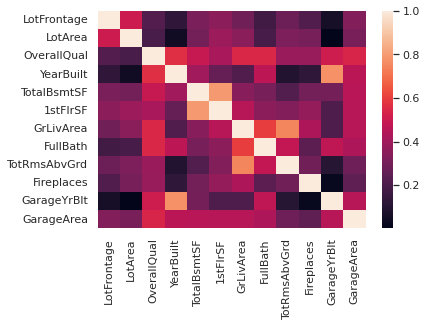

In [61]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_numericas.corr())

In [62]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_numericas.corr()    # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 YearBuilt <--> GarageYrBlt  ----> 0.7719493056331049
 TotalBsmtSF <--> 1stFlrSF  ----> 0.7899248393528692
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7484074725012069


In [63]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_numericas.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'], inplace = True)

### features_ln_numericas

<AxesSubplot:>

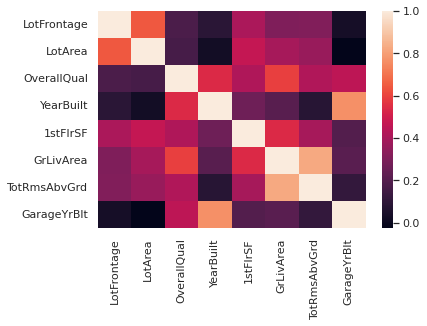

In [64]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_ln_numericas.corr())

In [65]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_ln_numericas.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 LotFrontage <--> LotArea  ----> 0.6432093861733416
 YearBuilt <--> GarageYrBlt  ----> 0.7663039071733068
 GrLivArea <--> TotRmsAbvGrd  ----> 0.8244265076005961


In [66]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_ln_numericas.drop(columns=['LotFrontage', 'GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

### features_numericas_sem_outlier

<AxesSubplot:>

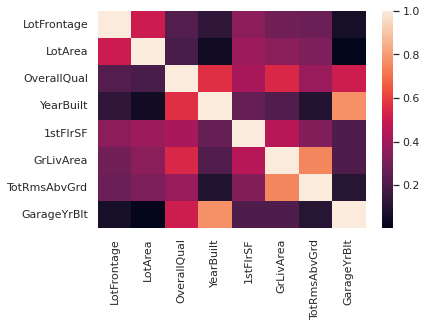

In [67]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_numericas_sem_outlier.corr())

In [68]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_numericas_sem_outlier.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 YearBuilt <--> GarageYrBlt  ----> 0.7719493056331049
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7484074725012069


In [69]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_numericas_sem_outlier.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

### features_ln_numericas_sem_outlier

<AxesSubplot:>

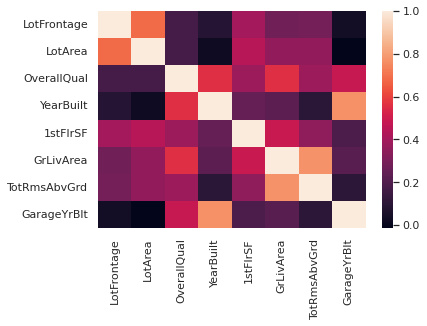

In [70]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_ln_numericas_sem_outlier.corr())

In [71]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_ln_numericas_sem_outlier.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 LotFrontage <--> LotArea  ----> 0.684477410800538
 YearBuilt <--> GarageYrBlt  ----> 0.7687321942746068
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7715395728594565


In [72]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_ln_numericas_sem_outlier.drop(columns=['LotFrontage', 'GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

# Normalização das Features e Target

### features_numericas

In [73]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_numericas_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_numericas_normalizadas = pd.DataFrame(features_numericas_parametro_normalizacao.fit_transform(features_numericas), columns=features_numericas.columns)

### features_ln_numericas

In [74]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_ln_numericas_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_ln_numericas_normalizadas = pd.DataFrame(features_ln_numericas_parametro_normalizacao.fit_transform(features_ln_numericas), columns=features_ln_numericas.columns)

### features_numericas_sem_outlier

In [75]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_numericas_sem_outlier_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_numericas_sem_outlier_normalizadas = pd.DataFrame(features_numericas_sem_outlier_parametro_normalizacao.fit_transform(features_numericas_sem_outlier), columns=features_numericas_sem_outlier.columns)

### features_ln_numericas_sem_outlier

In [76]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_ln_numericas_sem_outlier_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_ln_numericas_sem_outlier_normalizadas = pd.DataFrame(features_ln_numericas_sem_outlier_parametro_normalizacao.fit_transform(features_ln_numericas_sem_outlier), columns=features_ln_numericas_sem_outlier.columns)

### Target

In [77]:
# NORMALIZAÇÃO DA VARIÁVEL DEPENDENTE (TARGET)
target_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# CRIAÇÃO DE UM DF NORMALIZADO DA VARIÁVEL TARGET
y_treinamento_normalizada = pd.DataFrame(target_parametro_normalizacao.fit_transform(y_treinamento.values.reshape(-1, 1)), columns= [nome_target])



# NORMALIZAÇÃO DA VARIÁVEL DEPENDENTE (TARGET)
target_ln_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# CRIAÇÃO DE UM DF NORMALIZADO DA VARIÁVEL TARGET
y_treinamento_ln_normalizada = pd.DataFrame(target_ln_parametro_normalizacao.fit_transform(df_ln[nome_target].values.reshape(-1, 1)), columns= [nome_target])

# TREINAMENTO DOS MODELOS

Serão montados três modelos de regressão linear e ao final escolheremos aquele de melhor resultado. 

Para isso iremos calcular o **Coeficiênte de Determinação Múltipla**.

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas previamente separadas no data frame **"features_numericas"**.

In [78]:
# TREINAMENTO PARA FEATURES TOTAIS, NUMÉRICAS + CATEGÓRICAS
features_numericas_modelo = LinearRegression()
features_numericas_modelo.fit(features_numericas_normalizadas,y_treinamento_normalizada)

LinearRegression()

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [79]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo = LinearRegression()
features_ln_numericas_modelo.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

LinearRegression()

## Treinamento do modelo com features_numericas_sem_outlier

In [80]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo = LinearRegression()
features_numericas_sem_outlier_modelo.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

LinearRegression()

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [81]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo = LinearRegression()
features_ln_numericas_sem_outlier_modelo.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

LinearRegression()

# TRATAMENTO DOS DADOS DE VALIDAÇÃO

Para que sejam utilizados os dados que foram separados como validação é necessário normaliza-los com as mesmas regras de normalizção que foram utilizadas nos dados de treinamento.

## Tratamento das variáveis de validação para o modelo de features_numericas

In [82]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_numericas = dados_validacao[features_numericas_normalizadas.columns]
X_validacao_features_numericas[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_numericas = X_validacao_features_numericas.dropna()

# Separação das variáveis independentes e dependentes
Y_validacao_features_numericas = X_validacao_features_numericas[nome_target]
X_validacao_features_numericas = X_validacao_features_numericas.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_numericas_normalizado = pd.DataFrame(features_numericas_parametro_normalizacao.transform(X_validacao_features_numericas), columns=X_validacao_features_numericas.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_numericas_normalizado = pd.DataFrame(target_parametro_normalizacao.transform(Y_validacao_features_numericas.values.reshape(-1, 1)), columns=[nome_target])

/tmp/ipykernel_5756/2547549364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validacao_features_numericas[nome_target] = dados_validacao[nome_target]


## Tratamento das variáveis de validação para o modelo de features_ln_numericas

In [83]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_ln_numericas = dados_validacao[features_ln_numericas_normalizadas.columns]
X_validacao_features_ln_numericas[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.dropna()

# Aplicacação do logarítmo neperiano à todas as features
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.apply(np.log)

# Separação das variáveis independentes e dependentes
Y_validacao_features_ln_numericas = X_validacao_features_ln_numericas[nome_target]
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_ln_numericas_normalizado = pd.DataFrame(features_ln_numericas_parametro_normalizacao.transform(X_validacao_features_ln_numericas), columns=X_validacao_features_ln_numericas.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_ln_numericas_normalizado = pd.DataFrame(target_ln_parametro_normalizacao.transform(Y_validacao_features_ln_numericas.values.reshape(-1, 1)), columns=[nome_target])

/tmp/ipykernel_5756/429368494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validacao_features_ln_numericas[nome_target] = dados_validacao[nome_target]


## Tratamento das Features de validação para o modelo de features_numericas_sem_outlier

In [84]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_numericas_sem_outlier = dados_validacao[features_numericas_sem_outlier_normalizadas.columns]
X_validacao_features_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier.dropna()

# Separação das variáveis independentes e dependentes
Y_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier[nome_target]
X_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_numericas_sem_outlier_normalizado = pd.DataFrame(features_numericas_sem_outlier_parametro_normalizacao.transform(X_validacao_features_numericas_sem_outlier), columns=X_validacao_features_numericas_sem_outlier.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_numericas_sem_outlier_normalizado = pd.DataFrame(target_parametro_normalizacao.transform(Y_validacao_features_numericas_sem_outlier.values.reshape(-1, 1)), columns=[nome_target])

/tmp/ipykernel_5756/2397698693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validacao_features_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]


## Tratamento das Features de validação para o modelo de features_ln_numericas_sem_outlier

In [85]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_ln_numericas_sem_outlier = dados_validacao[features_ln_numericas_sem_outlier_normalizadas.columns]
X_validacao_features_ln_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.dropna()

# Aplicacação do logarítmo neperiano à todas as features
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.apply(np.log)

# Separação das variáveis independentes e dependentes
Y_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier[nome_target]
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_ln_numericas_sem_outlier_normalizado = pd.DataFrame(features_ln_numericas_sem_outlier_parametro_normalizacao.transform(X_validacao_features_ln_numericas_sem_outlier), columns=X_validacao_features_ln_numericas_sem_outlier.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_ln_numericas_sem_outlier_normalizado = pd.DataFrame(target_ln_parametro_normalizacao.transform(Y_validacao_features_ln_numericas_sem_outlier.values.reshape(-1, 1)), columns=[nome_target])

/tmp/ipykernel_5756/2237662914.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validacao_features_ln_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]


# VALIDAÇÃO DOS MODELOS 

# Validação do moledo com features_numericas

In [86]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Numéricas'] = features_numericas_modelo.score(features_numericas_normalizadas,y_treinamento_normalizada)
print(score_df.at['Regressão Linear Teste','Numéricas'])

0.7646302657642785


In [87]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Numéricas'] = features_numericas_modelo.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)
print(score_df.at['Regressão Linear Validação','Numéricas'])

0.8112022245439873


# Validação do moledo com features_ln_numericas

In [88]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Tranformada ln'] = features_ln_numericas_modelo.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)
print(score_df.at['Regressão Linear Teste','Tranformada ln'])

0.8163396630029656


In [89]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Tranformada ln'] = features_ln_numericas_modelo.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)
print(score_df.at['Regressão Linear Validação','Tranformada ln'])

0.8410463163305257


# Validação do moledo com features_numericas_sem_outlier

In [90]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)
print(score_df.at['Regressão Linear Teste','Numéricas sem Outlier'])

0.7452645882907092


In [91]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)
print(score_df.at['Regressão Linear Validação','Numéricas sem Outlier'])

0.8055567202638593


# Validação do moledo com features_ln_numericas_sem_outlier

In [92]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)
print(score_df.at['Regressão Linear Teste','Transformada ln sem Outlier'])

0.8029241890756852


In [93]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)
print(score_df.at['Regressão Linear Validação','Transformada ln sem Outlier'])

0.8460878660722106


# TREINAMENTO PARA O MODELO REGULARIZADO L1 (LASSO)

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear regularizado L1 (Lasso) para as variáveis numéricas.

Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização.

In [94]:
# Importa o método que faz pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
from sklearn.model_selection import GridSearchCV  

# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_numericas_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.0001


In [95]:
# TREINAMENTO PARA FEATURES NUMÉRICAS
features_numericas_modelo_l1 = Lasso(alpha=0.0001)
features_numericas_modelo_l1.fit(features_numericas_normalizadas,y_treinamento_normalizada)

Lasso(alpha=0.0001)

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [96]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_ln_numericas_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1e-05


In [97]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo_l1 = Lasso(alpha=0.00001)
features_ln_numericas_modelo_l1.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

Lasso(alpha=1e-05)

## Treinamento do modelo com features_numericas_sem_outlier

In [98]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_numericas_sem_outlier_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.0001


In [99]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo_l1 = Lasso(alpha=0.0001)
features_numericas_sem_outlier_modelo_l1.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

Lasso(alpha=0.0001)

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [100]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_ln_numericas_sem_outlier_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1e-05


In [101]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo_l1 = Lasso(alpha=0.0001)
features_ln_numericas_sem_outlier_modelo_l1.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

Lasso(alpha=0.0001)

# VALIDAÇÃO DO MODELO REGULARIZADO L1 (Lasso)

# Validação do moledo com features_numericas

In [102]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Numéricas'] = features_numericas_modelo_l1.score(features_numericas_normalizadas,y_treinamento_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Numéricas'])

In [103]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Numéricas'] = features_numericas_modelo_l1.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Numéricas'])

### Verificação das features igualadas a zero.

In [104]:
# Coeficientes das features
coeficientes = features_numericas_modelo_l1.coef_

# Identificando as features com coeficientes iguais a zero
features_zero_coef = features_numericas_normalizadas.columns[coeficientes == 0]
print("Features com coeficientes zero:", features_zero_coef)

Features com coeficientes zero: Index(['LotFrontage'], dtype='object')


# Validação do moledo com features_ln_numericas

In [105]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Tranformada ln'] = features_ln_numericas_modelo_l1.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Tranformada ln'])

In [106]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Tranformada ln'] = features_ln_numericas_modelo_l1.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Tranformada ln'])

# Validação do moledo com features_numericas_sem_outlier

In [107]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l1.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Numéricas sem Outlier'])

In [108]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l1.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Numéricas sem Outlier'])

# Validação do moledo com features_ln_numericas_sem_outlier

In [109]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l1.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Transformada ln sem Outlier'])

In [110]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l1.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Transformada ln sem Outlier'])

# TREINAMENTO PARA O MODELO REGULARIZADO L2 (RIDGE)

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear regularizado L1 (Lasso) para as variáveis numéricas.

Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização.

In [111]:
# Importa o método que faz pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
from sklearn.model_selection import GridSearchCV  

# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_numericas_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1


In [112]:
# TREINAMENTO PARA FEATURES NUMÉRICAS
features_numericas_modelo_l2 = Ridge(alpha=1)
features_numericas_modelo_l2.fit(features_numericas_normalizadas,y_treinamento_normalizada)

Ridge(alpha=1)

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [113]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_ln_numericas_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.1


In [114]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo_l2 = Ridge(alpha=0.1)
features_ln_numericas_modelo_l2.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

Ridge(alpha=0.1)

## Treinamento do modelo com features_numericas_sem_outlier

In [115]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_numericas_sem_outlier_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1


In [116]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo_l2 = Ridge(alpha=1)
features_numericas_sem_outlier_modelo_l2.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

Ridge(alpha=1)

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [117]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_ln_numericas_sem_outlier_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.1


In [118]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo_l2 = Ridge(alpha=0.1)
features_ln_numericas_sem_outlier_modelo_l2.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

Ridge(alpha=0.1)

# VALIDAÇÃO DO MODELO REGULARIZADO L2 (RIDGE)

# Validação do moledo com features_numericas

In [119]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Numéricas'] = features_numericas_modelo_l2.score(features_numericas_normalizadas,y_treinamento_normalizada)

In [120]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Numéricas'] = features_numericas_modelo_l2.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)

# Validação do moledo com features_ln_numericas

In [121]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Tranformada ln'] = features_ln_numericas_modelo_l2.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

In [122]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Tranformada ln'] = features_ln_numericas_modelo_l2.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)

# Validação do moledo com features_numericas_sem_outlier

In [123]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l2.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

In [124]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l2.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)

# Validação do moledo com features_ln_numericas_sem_outlier

In [125]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l2.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

In [126]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l2.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)

In [127]:
display(score_df)

,Numéricas,Tranformada ln,Numéricas sem Outlier,Transformada ln sem Outlier
Regressão Linear Teste,0.76463,0.81634,0.745265,0.802924
Regressão Linear Validação,0.811202,0.841046,0.805557,0.846088
Regressão Linear L1 Teste,0.764539,0.816339,0.745175,0.802866
Regressão Linear L1 Validação,0.810991,0.840955,0.805331,0.846005
Regressão Linear L2 Teste,0.764345,0.816328,0.744953,0.802921
Regressão Linear L2 Validação,0.811599,0.840742,0.806458,0.846045
